<a href="https://colab.research.google.com/github/scomarae/SkillBox/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%224_8_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%8F%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашняя работа

**Задание среднего уровня** Примените градиентный спуск к задаче прогнозирования цен на недвижимость в Бостоне. Какого качества на валидации удалось достичь по r2-score? Сколько итераций  понадобилось?

In [27]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = housing.data
y = housing.target


scaler = StandardScaler()

y_transformed = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y_transformed, test_size=0.2, random_state=10)

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from scipy.spatial import distance

%matplotlib inline

[2.4404238620857173e+31, 1.7882267902262598e+31, 1.4427560056460536e+31, 1.2836364428073517e+31, 1.089345296334459e+31, 1.0478568444711974e+31, 9.16852450764764e+30, 9.036477899592359e+30, 8.524850466091144e+30, 8.001167161068892e+30, 7.803781772092868e+30, 6.744652336547293e+30, 7.062364927961875e+30, 4.0058286771156706e+30, 6.053626345234467e+30, 4.569985833285686e+30, 5.826726011655145e+30, 5.720136109753602e+30, 5.841952065931544e+30, 5.710699215760199e+30, 5.257673626809119e+30, 5.437319102182967e+30, 5.28183600804947e+30, 5.126020956636801e+30, 4.8322759929915755e+30, 4.760205408155358e+30, 4.9202585071584033e+30, 4.5703599244513255e+30, 4.4564951551302586e+30, 4.2715929042162175e+30, 4.301428767122565e+30, 4.5267185403572147e+30, 4.1364952181999474e+30, 4.3035797199423613e+30, 4.297701596032463e+30, 3.9026409068097895e+30, 4.1472798667020564e+30, 4.114978695174749e+30, 3.952607223128517e+30, 3.8162282936556166e+30, 3.922890231883399e+30, 3.8706846621730217e+30, 3.651500622954353

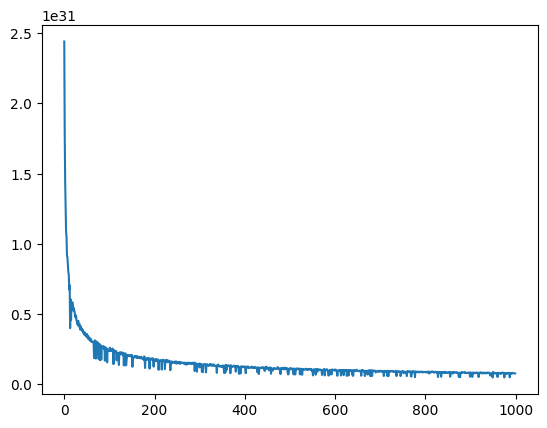

In [30]:
sgd_regressor = SGDRegressor(random_state=42) #класс линейнеой регрессии с шагом 0.009
w_current = np.random.random(1) #сюда будем записывать текущие значения весов
epsilon = 0.0001 #ошибка к которой мы стремимся

weight_evolution, mse_evolution = [], [] #списки изменений весов и ошибок

for step in list(range(1000)): #кол-во итераций
    # print(w_current)
    sgd_regressor = sgd_regressor.partial_fit(X_train, y_train) # итерация градиентного спуска
    weight_evolution.append(distance.euclidean(w_current, sgd_regressor.coef_)) # записываем изменение весов (евклидова дистанция между точками)
    if weight_evolution[-1]<epsilon: #если последний элемент в списке изменений весов меньше ошибки к которой мы стремимся
        print("Итерации остановлены на шаге %d" % step); break #останаваливаем итерации, выводим номер шага на котором это произошло
    mse_evolution.append(mean_squared_error(y_valid, sgd_regressor.predict(X_valid))) #иначе добавляем MSE в список
    w_current = sgd_regressor.coef_.copy() #и перезаписываем текущее значение весов
print(mse_evolution)
plt.plot(range(len(mse_evolution)), mse_evolution) #строим график ошибок